In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/web-log-data/web_log_data.csv


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [46]:
df = pd.read_csv("/kaggle/input/web-log-data/web_log_data.csv")

In [47]:
df.head()

,ip,date_time,request,step,session,user_id
0,c210-49-32-6.rochd2.,18/Apr/2005:21:25:07,/,1,3,3
1,visp.inabox.telstra.,19/Apr/2005:08:24:28,/,1,12,12
2,dsl-61-95-54-84.requ,19/Apr/2005:08:33:01,/,1,13,13
3,d220-236-91-52.dsl.n,19/Apr/2005:09:16:06,/,1,15,15
4,allptrs.eq.edu.au,19/Apr/2005:09:47:54,/,1,22,22


In [48]:
df

,ip,date_time,request,step,session,user_id
0,c210-49-32-6.rochd2.,18/Apr/2005:21:25:07,/,1,3,3
1,visp.inabox.telstra.,19/Apr/2005:08:24:28,/,1,12,12
2,dsl-61-95-54-84.requ,19/Apr/2005:08:33:01,/,1,13,13
3,d220-236-91-52.dsl.n,19/Apr/2005:09:16:06,/,1,15,15
4,allptrs.eq.edu.au,19/Apr/2005:09:47:54,/,1,22,22
...,...,...,...,...,...,...
5861,lj2362.inktomisearch,29/Apr/2005:07:45:51,/wynnum.html,1,462,462
5862,lj2362.inktomisearch,06/May/2005:21:18:30,/wynnum.html,1,780,780
5863,lj2362.inktomisearch,14/May/2005:09:18:38,/wynnum.html,1,1100,1100
5864,lj2362.inktomisearch,21/May/2005:21:18:39,/wynnum.html,1,1475,1475


In [49]:
print("no of unique dates:", df['date_time'].nunique())

print("no of unique requests:, " , df['request'].nunique())

print("no of unique session:", df['session'].nunique())

print("no of unique user_id:, " , df['user_id'].nunique())

print("no of unique ip:", df['ip'].nunique())

no of unique dates: 4901
no of unique requests:,  114
no of unique session: 1939
no of unique user_id:,  1939
no of unique ip: 889


In [50]:
df.describe()

,step,session,user_id
count,5866.000000,5866.000000,5866.000000
mean,4.795431,1005.006308,1005.006308
std,6.005092,550.326259,550.326259
min,1.000000,1.000000,1.000000
25%,1.000000,569.000000,569.000000
50%,3.000000,994.500000,994.500000
75%,6.000000,1432.000000,1432.000000
max,63.000000,1939.000000,1939.000000


In [51]:
df.isnull().sum().sum()

0

In [52]:
#df['ip'].value_counts().head(40).plot.bar(color=color)

Text(0.5, 1.0, 'most popular requests by the users')

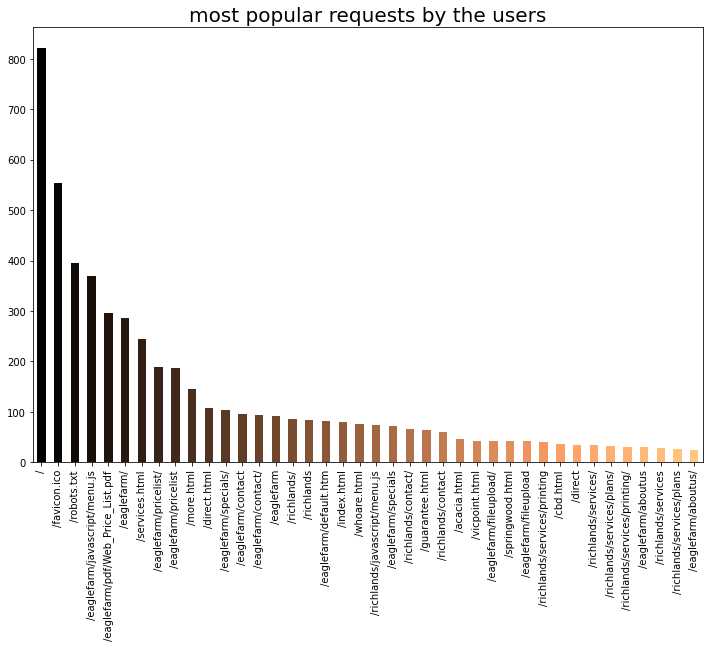

In [53]:
plt.rcParams['figure.figsize'] = (12, 8)

color = plt.cm.copper(np.linspace(0,1 , 40))
df['request'].value_counts().head(40).plot.bar(color=color)
plt.title("most popular requests by the users", fontsize=20)

Text(0.5, 1.0, 'most popular session by the users')

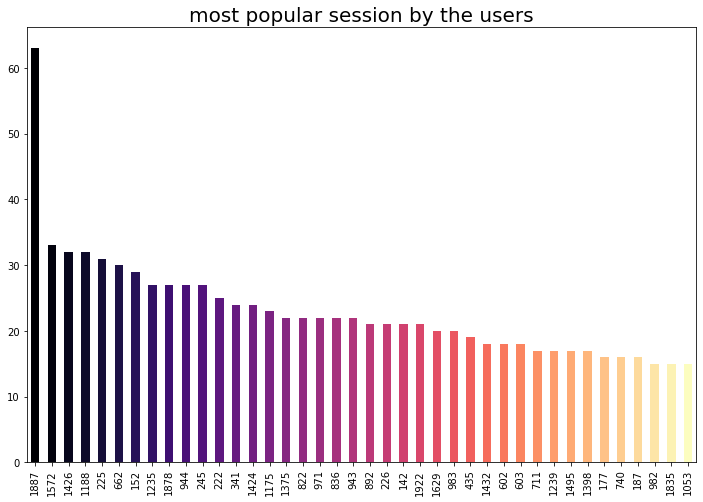

In [54]:
plt.rcParams['figure.figsize'] = (12, 8)

color = plt.cm.magma(np.linspace(0,1 , 40))
df['session'].value_counts().head(40).plot.bar(color=color)
plt.title("most popular session by the users", fontsize=20)

Text(0.5, 1.0, 'Most Popular step used by the Users')

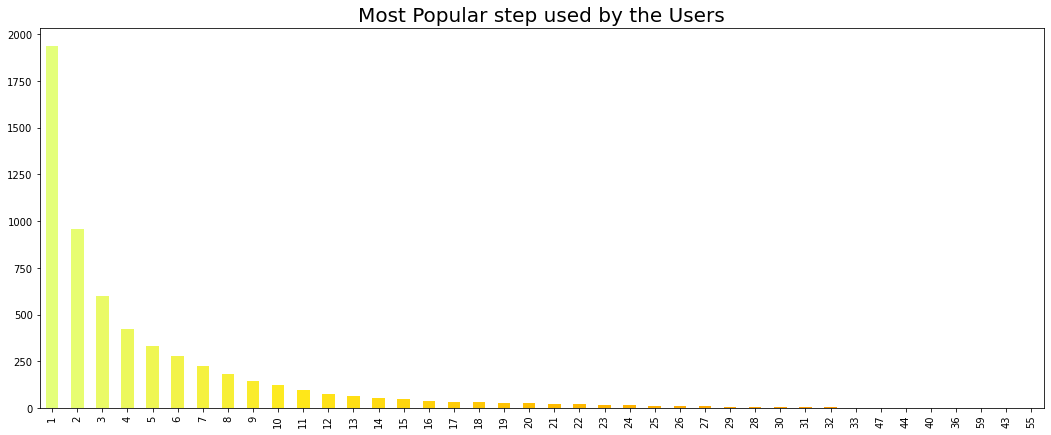

In [55]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.Wistia(np.linspace(0, 1, 40))
df['step'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular step used by the Users', fontsize = 20)

In [56]:
df['date_time'] = df['date_time'].str.split(":", n=1, expand=True)
df['date_time']

0       18/Apr/2005
1       19/Apr/2005
2       19/Apr/2005
3       19/Apr/2005
4       19/Apr/2005
           ...     
5861    29/Apr/2005
5862    06/May/2005
5863    14/May/2005
5864    21/May/2005
5865    29/May/2005
Name: date_time, Length: 5866, dtype: object

In [57]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day

In [58]:
df

,ip,date_time,request,step,session,user_id,month,day
0,c210-49-32-6.rochd2.,2005-04-18,/,1,3,3,4,18
1,visp.inabox.telstra.,2005-04-19,/,1,12,12,4,19
2,dsl-61-95-54-84.requ,2005-04-19,/,1,13,13,4,19
3,d220-236-91-52.dsl.n,2005-04-19,/,1,15,15,4,19
4,allptrs.eq.edu.au,2005-04-19,/,1,22,22,4,19
...,...,...,...,...,...,...,...,...
5861,lj2362.inktomisearch,2005-04-29,/wynnum.html,1,462,462,4,29
5862,lj2362.inktomisearch,2005-05-06,/wynnum.html,1,780,780,5,6
5863,lj2362.inktomisearch,2005-05-14,/wynnum.html,1,1100,1100,5,14
5864,lj2362.inktomisearch,2005-05-21,/wynnum.html,1,1475,1475,5,21


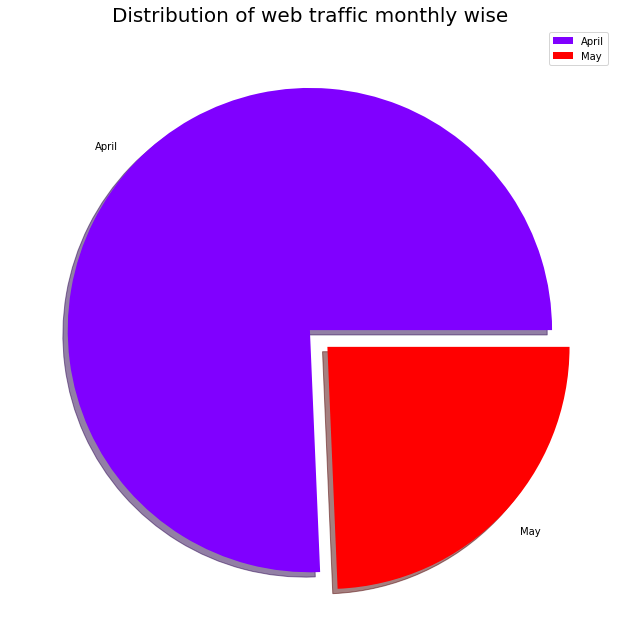

In [59]:
size = df['month'].value_counts()
color = plt.cm.rainbow(np.linspace(0 ,1, 2))
labels ="April", "May"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9 , 9)
plt.pie(size, colors = color, labels = labels, explode=explode, 
       shadow=True)
plt.title("Distribution of web traffic monthly wise", fontsize=20)
plt.tight_layout()
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of web traffic daisly baic')

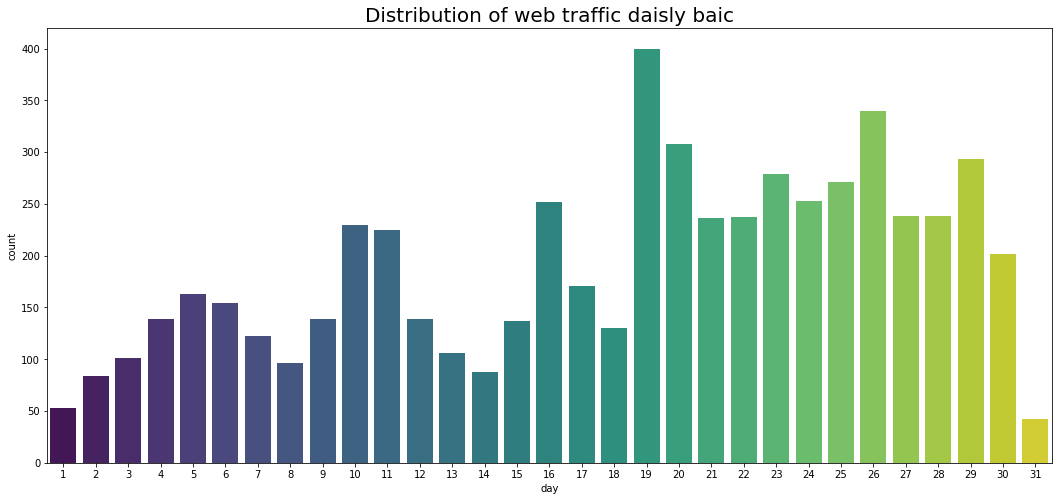

In [60]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.countplot(df['day'], palette='viridis')
plt.title("Distribution of web traffic daisly baic", fontsize=20)

In [61]:
df = df.drop('date_time', axis=1)

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ip']= le.fit_transform(df['ip'])
df['request'] = le.fit_transform(df['request'])

df.columns

Index(['ip', 'request', 'step', 'session', 'user_id', 'month', 'day'], dtype='object')

In [63]:
df

,ip,request,step,session,user_id,month,day
0,284,0,1,3,3,4,18
1,874,0,1,12,12,4,19
2,638,0,1,13,13,4,19
3,593,0,1,15,15,4,19
4,258,0,1,22,22,4,19
...,...,...,...,...,...,...,...
5861,727,113,1,462,462,4,29
5862,727,113,1,780,780,5,6
5863,727,113,1,1100,1100,5,14
5864,727,113,1,1475,1475,5,21


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5866 entries, 0 to 5865
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ip       5866 non-null   int64
 1   request  5866 non-null   int64
 2   step     5866 non-null   int64
 3   session  5866 non-null   int64
 4   user_id  5866 non-null   int64
 5   month    5866 non-null   int64
 6   day      5866 non-null   int64
dtypes: int64(7)
memory usage: 320.9 KB


In [65]:
x = df.iloc[:, [2 , 6]].values

In [66]:
x

array([[ 1, 18],
       [ 1, 19],
       [ 1, 19],
       ...,
       [ 1, 14],
       [ 1, 21],
       [ 1, 29]])

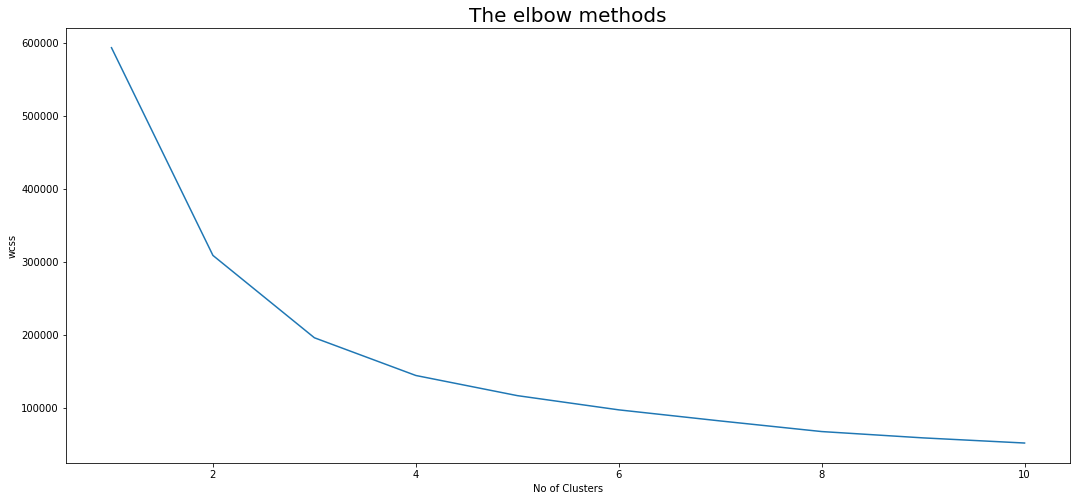

In [67]:
#data preparation

x = df.iloc[:, [2, 6]].values

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init='k-means++', 
max_iter=300, 
n_init =10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11) , wcss)
plt.title("The elbow methods", fontsize=20)
plt.xlabel("No of Clusters")
plt.ylabel("wcss")
plt.show()

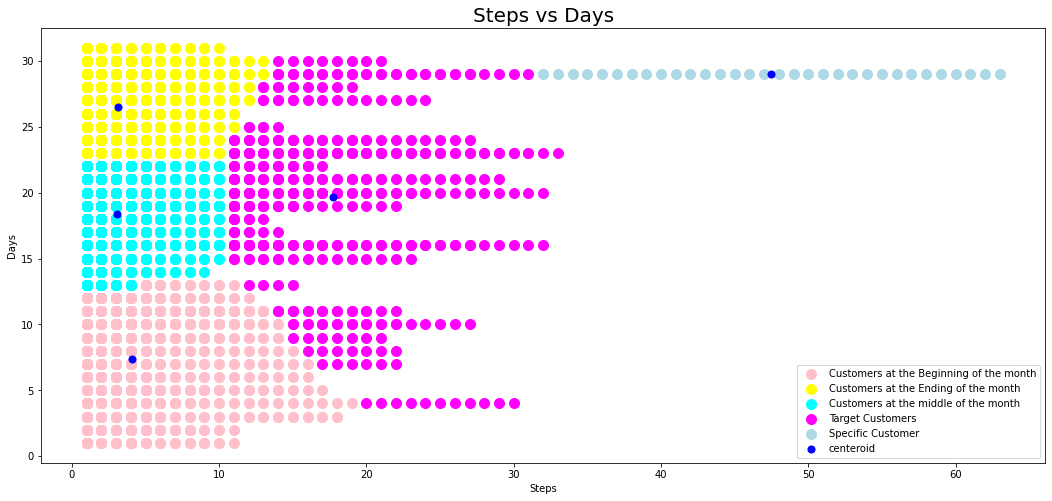

In [68]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Customers at the Beginning of the month')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Customers at the Ending of the month')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Customers at the middle of the month')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Target Customers')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'lightblue', label = 'Specific Customer')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Steps vs Days', fontsize = 20)
plt.ylabel('Days')
plt.xlabel('Steps')
plt.legend()
plt.show()


In [69]:
df.head()

,ip,request,step,session,user_id,month,day
0,284,0,1,3,3,4,18
1,874,0,1,12,12,4,19
2,638,0,1,13,13,4,19
3,593,0,1,15,15,4,19
4,258,0,1,22,22,4,19


In [70]:
y = df['month']

df  = df.drop(['month'], axis=1)

x = df

print("shape of x: ", x.shape)
print("shape of y: ", y.shape)

shape of x:  (5866, 6)
shape of y:  (5866,)


In [71]:
x

,ip,request,step,session,user_id,day
0,284,0,1,3,3,18
1,874,0,1,12,12,19
2,638,0,1,13,13,19
3,593,0,1,15,15,19
4,258,0,1,22,22,19
...,...,...,...,...,...,...
5861,727,113,1,462,462,29
5862,727,113,1,780,780,6
5863,727,113,1,1100,1100,14
5864,727,113,1,1475,1475,21


In [72]:
from sklearn.model_selection import train_test_split


x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)

print("shape of x_train", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

shape of x_train (4692, 6)
Shape of x_test : (1174, 6)
Shape of y_train : (4692,)
Shape of y_test : (1174,)


In [73]:
x_train

,ip,request,step,session,user_id,day
1427,10,49,6,836,836,8
3758,13,68,10,1350,1350,19
1267,403,47,18,1887,1887,29
866,13,7,8,1350,1350,19
5649,487,103,2,1910,1910,30
...,...,...,...,...,...,...
4931,785,99,3,1247,1247,17
3264,362,66,11,943,943,10
1653,440,51,2,1026,1026,12
2607,328,62,5,339,339,27


In [74]:
x_test.columns

Index(['ip', 'request', 'step', 'session', 'user_id', 'day'], dtype='object')

In [75]:
x_train.columns

Index(['ip', 'request', 'step', 'session', 'user_id', 'day'], dtype='object')

In [76]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [77]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [78]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [79]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


              precision    recall  f1-score   support

           4       1.00      1.00      1.00       324
           5       1.00      1.00      1.00       850

    accuracy                           1.00      1174
   macro avg       1.00      1.00      1.00      1174
weighted avg       1.00      1.00      1.00      1174



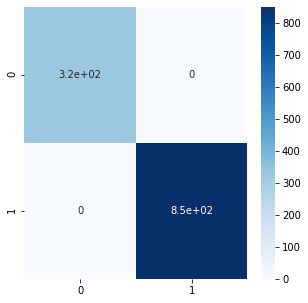

In [80]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Blues')

cr = classification_report(y_test, y_pred)
print(cr)

feature importance plot

Text(0.5, 1.0, 'Feature Importance Plot')

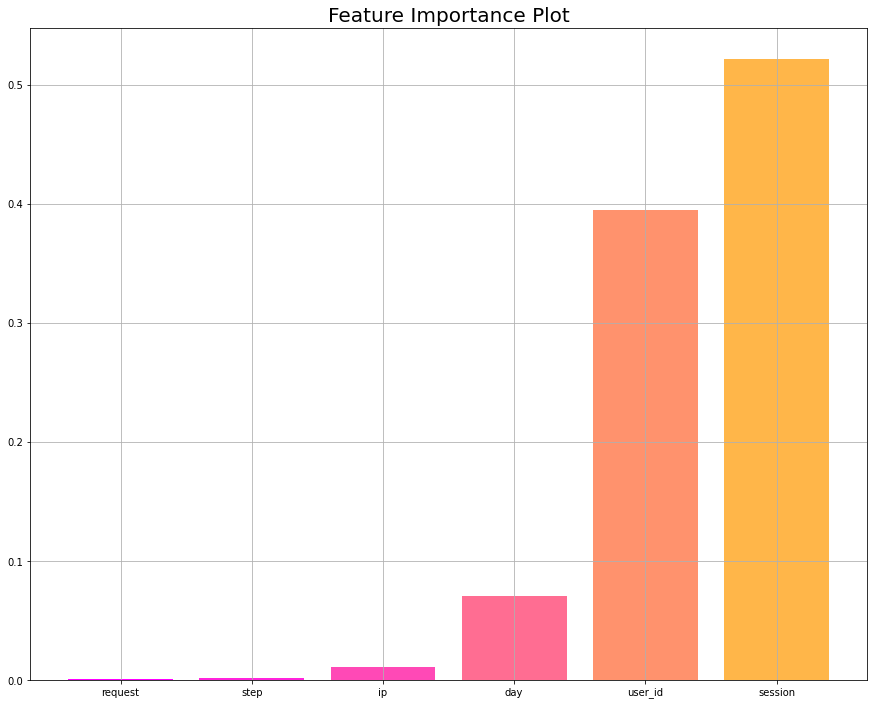

In [81]:
importance = model.feature_importances_
labels = x.columns
indices = np.argsort(importance)
color = plt.cm.spring(np.linspace(0, 1, 8))

plt.rcParams['figure.figsize'] = (15, 12)
plt.bar(range(len(importance)), importance[indices], color = color)
plt.grid()
plt.xticks(range(len(labels)), labels[indices])
plt.title('Feature Importance Plot', fontsize = 20)